In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Types of Wine Dataset downloaded from http://archive.ics.uci.edu/ml/datasets/wine
# Importing the Wine Dataset

df = pd.read_csv('Wine.csv')

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
print("Shape of the Dataset: {}".format(df.shape))
print('\n')
print("Number of null values in the dataset: {}".format(df.isnull().sum()))

Shape of the Dataset: (178, 14)


Number of null values in the dataset: Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [6]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


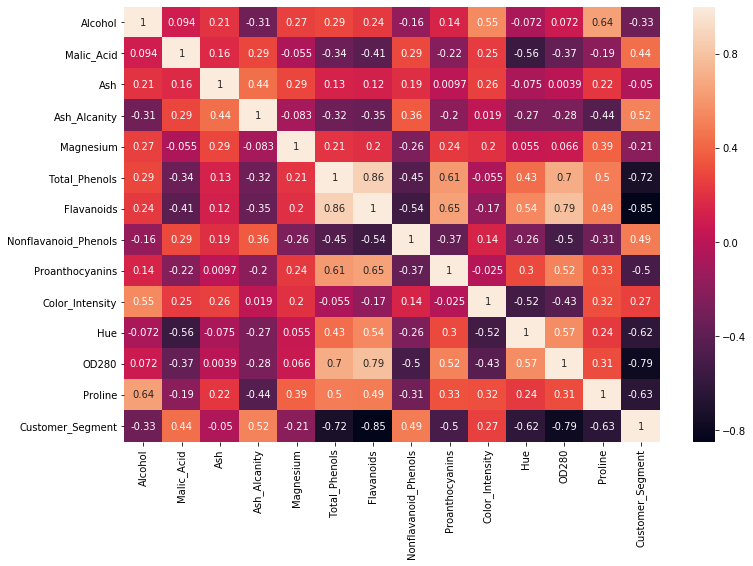

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [8]:
X = df.drop(['Customer_Segment'], axis = 1)
X.shape

(178, 13)

In [9]:
y = df['Customer_Segment']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Customer_Segment, dtype: int64

### Doing a Train - Test split on the dataset 

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


### Applying PCA 

In [21]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=None)

# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

# pca.explained_variance_ratio_


array([0.35900066, 0.18691934, 0.11606557, 0.07371716, 0.0665386 ,
       0.04854582, 0.04195042, 0.02683922, 0.0234746 , 0.01889734,
       0.01715943, 0.01262928, 0.00826257])

In [12]:
# In the above section we find that the first two explained variace ratios - (0.359 + 0.186) almost explains 54% of the 
# variance. 
# We block the above block of code and run the same code below with n_components = 2.
# Also we have to RESTART the kernel.

In [12]:
# Now considering 2 principal components.

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

pca.explained_variance_ratio_


array([0.35900066, 0.18691934])

### Applying Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_pred = logreg.predict(X_test)

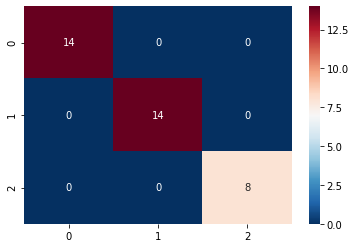

In [15]:
## Confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='RdBu_r')

In [16]:
from sklearn.metrics import accuracy_score
acs = accuracy_score(y_test, y_pred)
acs

1.0

#### High Dimensional Visualization 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


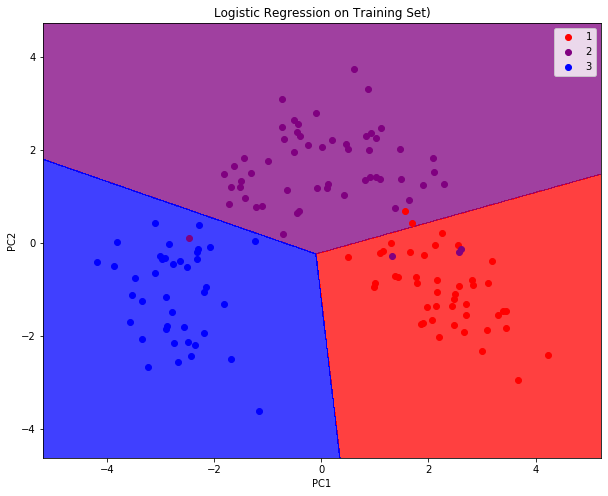

In [18]:
# Visualising the Training set results
plt.figure(figsize=(10,8))
from matplotlib.colors import ListedColormap
xx, yy = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = xx[:, 0].min() - 1, stop = xx[:, 0].max() + 1, step = 0.01),
                     np.arange(start = xx[:, 1].min() - 1, stop = xx[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logreg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'purple', 'blue'))) # 3 colors for 3 different segments
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(yy)):
    plt.scatter(xx[yy == j, 0], xx[yy == j, 1],
                c = ListedColormap(('red', 'purple', 'blue'))(i), label = j)
plt.title('Logistic Regression on Training Set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


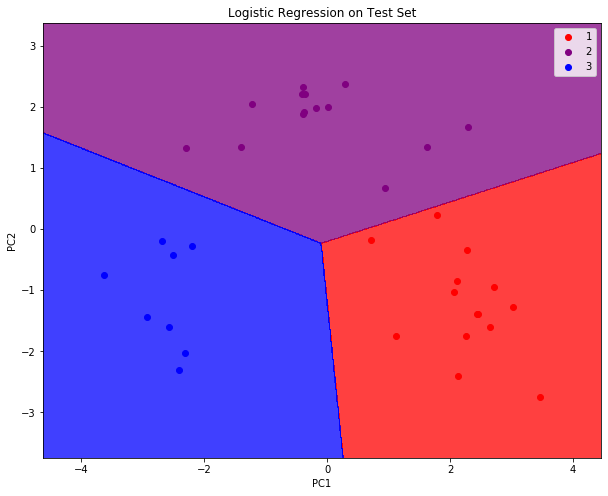

In [19]:
# Visualising the Test set results
plt.figure(figsize=(10,8))
from matplotlib.colors import ListedColormap
xx, yy = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = xx[:, 0].min() - 1, stop = xx[:, 0].max() + 1, step = 0.01),
                     np.arange(start = xx[:, 1].min() - 1, stop = xx[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logreg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'purple', 'blue')))   # 3 colors for 3 different segments
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(yy)):
    plt.scatter(xx[yy == j, 0], xx[yy == j, 1],
                c = ListedColormap(('red', 'purple', 'blue'))(i), label = j)
plt.title('Logistic Regression on Test Set')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
